In [204]:
!pip install scikit-multilearn

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Feature Selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA

# Libraries for Problem Transformation

from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

# Libraries for model training

from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score

# Libraries for algorithm

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
# Libraries for testing

from sklearn.metrics import accuracy_score , classification_report

# Removing warnings

import warnings
warnings.filterwarnings('ignore')

# Storing plots

%matplotlib inline

In [206]:
df1 = pd.read_csv('h1n1_vaccine_prediction.csv')
df1

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [207]:
df1 = pd.read_csv('h1n1_vaccine_prediction.csv')
features = df1[['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication', 'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently', 'avoid_large_gatherings', 'reduced_outside_home_cont', 'avoid_touch_face','dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'chronic_medic_condition', 'cont_child_undr_6_mnths', 'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective', 'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification', 'race', 'sex', 'income_level', 'marital_status', 'housing_status', 'employment', 'census_msa', 'no_of_adults', 'no_of_children']]
labels=df1[['h1n1_vaccine']]

In [208]:
features.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0


In [209]:
labels.head()

,h1n1_vaccine
0,0
1,0
2,0
3,0
4,0


In [210]:
features.shape

(26707, 33)

In [211]:
labels.shape

(26707, 1)

In [212]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [213]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   h1n1_vaccine  26707 non-null  int64
dtypes: int64(1)
memory usage: 208.8 KB


In [214]:
features.duplicated().sum()

0

In [215]:
labels.duplicated().sum()

26705

In [216]:
features.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [217]:
labels.isnull().sum()

h1n1_vaccine    0
dtype: int64

In [218]:
features = features.fillna(features.mean())
features = round(features)

features = features.fillna('No Category')

In [219]:
features.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [220]:
features.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [221]:
# For Datatype = float
##########3
print("h1n1_worry")
print(features.h1n1_worry.unique())
##########
print("h1n1_awareness")
print(features.h1n1_awareness.unique())
print("antiviral_medication")
print(features.antiviral_medication.unique())
#############
print("contact_avoidance")
print(features.contact_avoidance.unique())
###########
print("bought_face_mask")
print(features.bought_face_mask.unique())
#############
print("wash_hands_frequently")
print(features.wash_hands_frequently.unique())
############
print("avoid_large_gatherings")
print(features.avoid_large_gatherings.unique())
############
print("reduced_outside_home_cont")
print(features.reduced_outside_home_cont.unique())
##########3
print("avoid_touch_face")
print(features.avoid_touch_face.unique())
#############3
print("dr_recc_h1n1_vacc")
print(features.dr_recc_h1n1_vacc.unique())
#########333
print("dr_recc_seasonal_vacc")
print(features.dr_recc_seasonal_vacc.unique())
############
print("chronic_medic_condition")
print(features.chronic_medic_condition.unique())
###########
print("cont_child_undr_6_mnths")
print(features.cont_child_undr_6_mnths.unique())
#############33
print("is_health_worker")
print(features.is_health_worker.unique())
##############
print("has_health_insur")
print(features.has_health_insur.unique())
###############
print("is_h1n1_vacc_effective")
print(features.is_h1n1_vacc_effective.unique())
################
print("is_h1n1_risky")
print(features.is_h1n1_risky.unique())
#############
print("sick_from_h1n1_vacc")
print(features.sick_from_h1n1_vacc.unique())
############
print("is_seas_vacc_effective")
print(features.is_seas_vacc_effective.unique())
##########
print("is_seas_risky")
print(features.is_seas_risky.unique())
###########33
print("sick_from_seas_vacc")
print(features.sick_from_seas_vacc.unique())

h1n1_worry
[1. 3. 2. 0.]
h1n1_awareness
[0. 2. 1.]
antiviral_medication
[0. 1.]
contact_avoidance
[0. 1.]
bought_face_mask
[0. 1.]
wash_hands_frequently
[0. 1.]
avoid_large_gatherings
[0. 1.]
reduced_outside_home_cont
[1. 0.]
avoid_touch_face
[1. 0.]
dr_recc_h1n1_vacc
[0. 1.]
dr_recc_seasonal_vacc
[0. 1.]
chronic_medic_condition
[0. 1.]
cont_child_undr_6_mnths
[0. 1.]
is_health_worker
[0. 1.]
has_health_insur
[1. 0.]
is_h1n1_vacc_effective
[3. 5. 4. 2. 1.]
is_h1n1_risky
[1. 4. 3. 2. 5.]
sick_from_h1n1_vacc
[2. 4. 1. 5. 3.]
is_seas_vacc_effective
[2. 4. 5. 3. 1.]
is_seas_risky
[1. 2. 4. 3. 5.]
sick_from_seas_vacc
[2. 4. 1. 5. 3.]


In [222]:
# For Datatype = object
#####3
print("age_bracket")
print(features.age_bracket.unique())
#########3
print("qualification")
print(features.qualification.unique())
########
print("race")
print(features.race.unique())
########
print("income_level")
print(features.income_level.unique())
########
print("marital_status")
print(features.marital_status.unique())
#######
print("housing_status")
print(features.housing_status.unique())
#########
print("employment")
print(features.employment.unique())

#print("hhs_geo_region")
#print(features.hhs_geo_region.unique())
#######3
print("census_msa")
print(features.census_msa.unique())

#print("employment_industry")
#print(features.employment_industry.unique())

#print("employment_occupation")
#print(features.employment_occupation.unique())


age_bracket
['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
qualification
['< 12 Years' '12 Years' 'College Graduate' 'Some College' 'No Category']
race
['White' 'Black' 'Other or Multiple' 'Hispanic']
income_level
['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' 'No Category']
marital_status
['Not Married' 'Married' 'No Category']
housing_status
['Own' 'Rent' 'No Category']
employment
['Not in Labor Force' 'Employed' 'Unemployed' 'No Category']
census_msa
['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']


In [178]:
enc = LabelEncoder()

In [179]:
features.age_bracket = enc.fit_transform(features.age_bracket)
features.qualification = enc.fit_transform(features.qualification)
features.race = enc.fit_transform(features.race)
features.sex = enc.fit_transform(features.sex)
features.income_level = enc.fit_transform(features.income_level)
features.marital_status = enc.fit_transform(features.marital_status)
features.housing_status = enc.fit_transform(features.housing_status)
features.employment = enc.fit_transform(features.employment)
#features.hhs_geo_region = enc.fit_transform(features.hhs_geo_region)
features.census_msa = enc.fit_transform(features.census_msa)
#features.employment_industry = enc.fit_transform(features.employment_industry)
#features.employment_occupation = enc.fit_transform(features.employment_occupation)

In [180]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26707 non-null  float64
 2   h1n1_awareness             26707 non-null  float64
 3   antiviral_medication       26707 non-null  float64
 4   contact_avoidance          26707 non-null  float64
 5   bought_face_mask           26707 non-null  float64
 6   wash_hands_frequently      26707 non-null  float64
 7   avoid_large_gatherings     26707 non-null  float64
 8   reduced_outside_home_cont  26707 non-null  float64
 9   avoid_touch_face           26707 non-null  float64
 10  dr_recc_h1n1_vacc          26707 non-null  float64
 11  dr_recc_seasonal_vacc      26707 non-null  float64
 12  chronic_medic_condition    26707 non-null  float64
 13  cont_child_undr_6_mnths    26707 non-null  flo

In [181]:
features.head(10)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1,3,0,2,2,1,2,2,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,3,1,2,2,2,0,0,0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2,3,1,0,2,1,0,0,2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,3,0,2,2,2,2,1,0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,4,3,0,0,0,1,0,0,1.0,0.0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0,3,1,0,0,1,0,1,2.0,3.0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,3,1,0,2,1,0,0,0.0,0.0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,4,3,0,0,0,1,0,2,2.0,0.0
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,2,3,1,1,0,1,0,0,1.0,0.0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0,3,1,0,2,1,2,0,0.0,0.0


In [182]:
features.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,13353.000000,1.619800,1.261392,0.048714,0.727749,0.068933,0.825888,0.357472,0.336279,0.678811,...,2.057513,2.570300,0.406223,0.953795,0.932190,1.145542,0.984161,0.833489,0.887558,0.538922
std,7709.791156,0.909016,0.617047,0.215273,0.445127,0.253345,0.379213,0.479264,0.472444,0.466942,...,1.435626,0.923226,0.491136,1.113444,0.970936,0.526582,1.052723,0.823313,0.749980,0.924918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,2.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,3.000000,1.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000


In [183]:
# Function to find the outliers

def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return np.array(outliers) 

In [184]:
print(len(findoutliers(features.no_of_adults)))
print(len(findoutliers(features.no_of_children)))

1125
1747


In [185]:
findoutliers(features.no_of_adults)

array([3., 3., 3., ..., 3., 3., 3.])

In [186]:
findoutliers(features.no_of_children)

array([3., 3., 3., ..., 3., 3., 3.])

<AxesSubplot:xlabel='no_of_adults'>

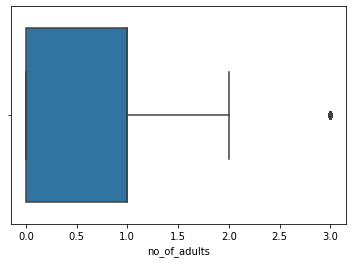

In [187]:
sns.boxplot(features.no_of_adults)

<AxesSubplot:xlabel='no_of_children'>

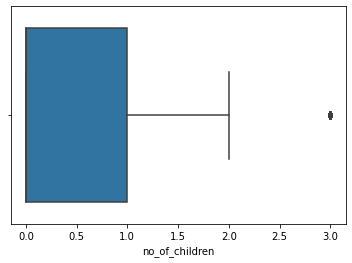

In [188]:
sns.boxplot(features.no_of_children)

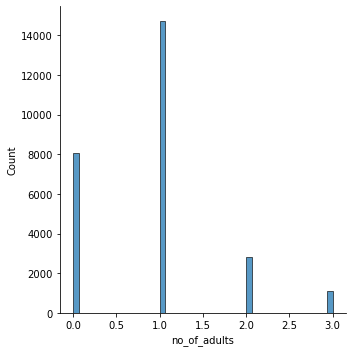

In [189]:
sns.displot(features.no_of_adults)

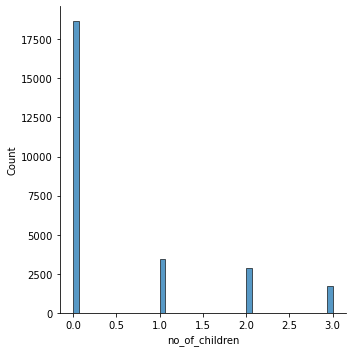

In [190]:
sns.displot(features.no_of_children)

In [191]:
features.h1n1_worry.value_counts()

2.0    10667
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_worry, dtype: int64

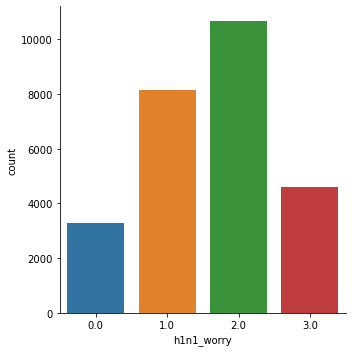

In [192]:
sns.factorplot('h1n1_worry', data = features, kind = "count")

In [193]:
features.h1n1_awareness.value_counts()

1.0    14714
2.0     9487
0.0     2506
Name: h1n1_awareness, dtype: int64

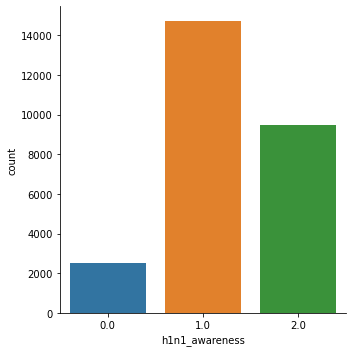

In [194]:
sns.factorplot('h1n1_awareness', data = features, kind = "count")

In [195]:
features.antiviral_medication.value_counts()

0.0    25406
1.0     1301
Name: antiviral_medication, dtype: int64

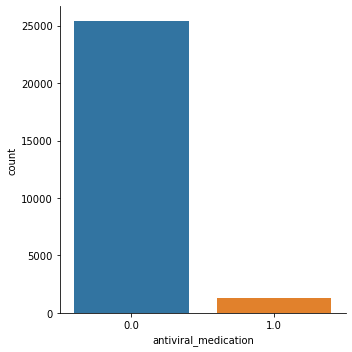

In [196]:
sns.factorplot('antiviral_medication', data = features, kind = "count")

In [197]:
features.contact_avoidance.value_counts()

1.0    19436
0.0     7271
Name: contact_avoidance, dtype: int64

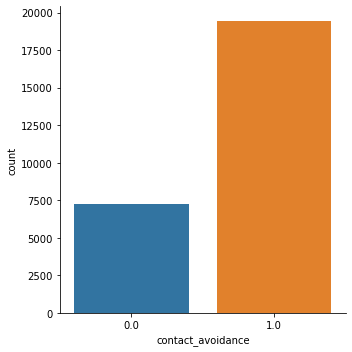

In [198]:
sns.factorplot('contact_avoidance', data = features, kind = "count")

In [199]:
features.bought_face_mask.value_counts()

0.0    24866
1.0     1841
Name: bought_face_mask, dtype: int64

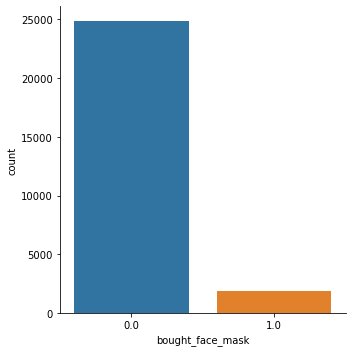

In [200]:
sns.factorplot('bought_face_mask', data = features, kind = "count")

In [201]:
features.wash_hands_frequently.value_counts()

1.0    22057
0.0     4650
Name: wash_hands_frequently, dtype: int64

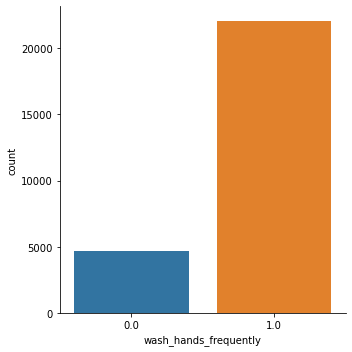

In [202]:
sns.factorplot('wash_hands_frequently', data = features, kind = "count")

In [66]:
features.avoid_large_gatherings.value_counts()

0.0    17160
1.0     9547
Name: avoid_large_gatherings, dtype: int64

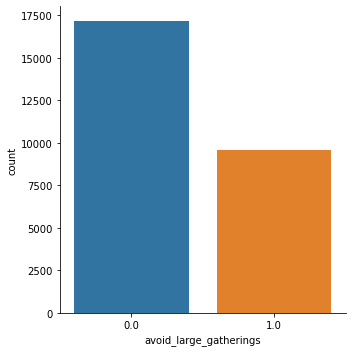

In [67]:
sns.factorplot('avoid_large_gatherings', data = features, kind = "count")

In [68]:
features.reduced_outside_home_cont.value_counts()

0.0    17726
1.0     8981
Name: reduced_outside_home_cont, dtype: int64

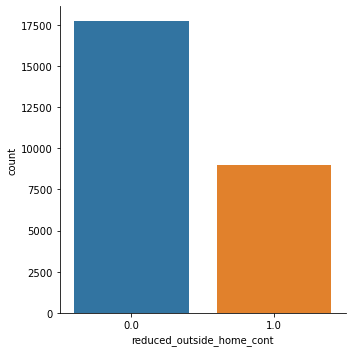

In [69]:
sns.factorplot('reduced_outside_home_cont', data = features, kind = "count")

In [70]:
features.avoid_touch_face.value_counts()

1.0    18129
0.0     8578
Name: avoid_touch_face, dtype: int64

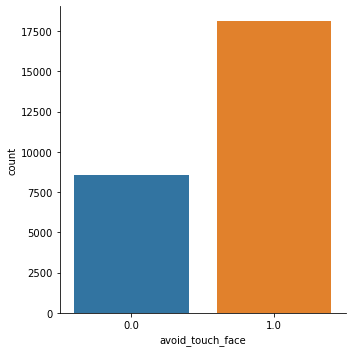

In [71]:
sns.factorplot('avoid_touch_face', data = features, kind = "count")

In [72]:
features.dr_recc_h1n1_vacc.value_counts()

0.0    21299
1.0     5408
Name: dr_recc_h1n1_vacc, dtype: int64

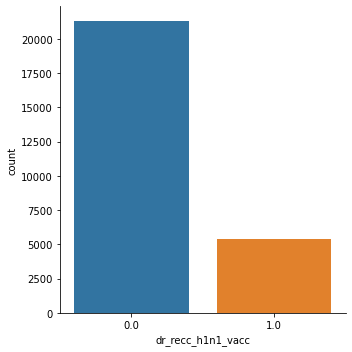

In [73]:
sns.factorplot('dr_recc_h1n1_vacc', data = features, kind = "count")

In [74]:
features.dr_recc_seasonal_vacc.value_counts()

0.0    18613
1.0     8094
Name: dr_recc_seasonal_vacc, dtype: int64

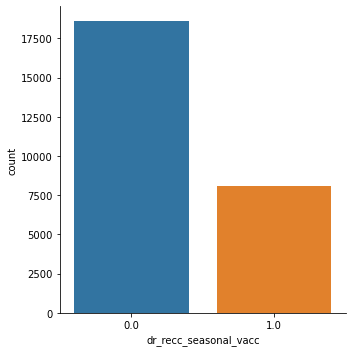

In [75]:
sns.factorplot('dr_recc_seasonal_vacc', data = features, kind = "count")

In [76]:
features.chronic_medic_condition.value_counts()

0.0    19417
1.0     7290
Name: chronic_medic_condition, dtype: int64

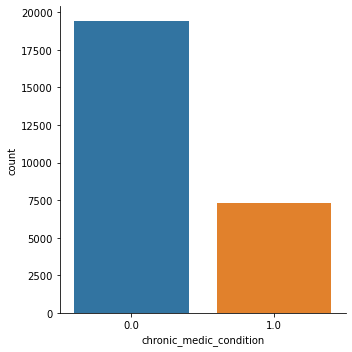

In [77]:
sns.factorplot('chronic_medic_condition', data = features, kind = "count")

In [78]:
features.cont_child_undr_6_mnths.value_counts()

0.0    24569
1.0     2138
Name: cont_child_undr_6_mnths, dtype: int64

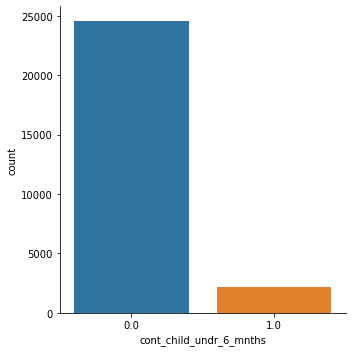

In [79]:
sns.factorplot('cont_child_undr_6_mnths', data = features, kind = "count")

In [80]:
features.is_health_worker.value_counts()

0.0    23808
1.0     2899
Name: is_health_worker, dtype: int64

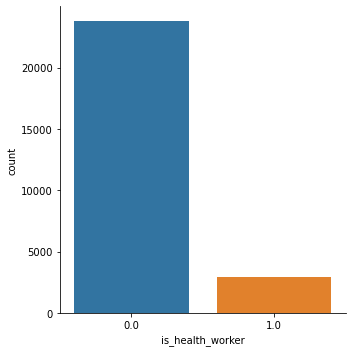

In [81]:
sns.factorplot('is_health_worker', data = features, kind = "count")

In [82]:
features.has_health_insur.value_counts()

1.0    24971
0.0     1736
Name: has_health_insur, dtype: int64

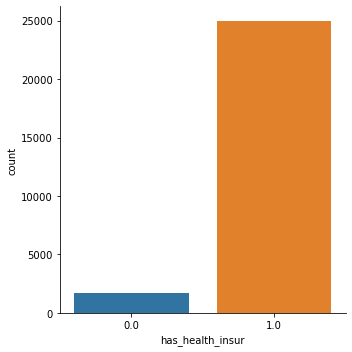

In [83]:
sns.factorplot('has_health_insur', data = features, kind = "count")

In [84]:
features.is_h1n1_vacc_effective.value_counts()

4.0    12074
5.0     7166
3.0     4723
2.0     1858
1.0      886
Name: is_h1n1_vacc_effective, dtype: int64

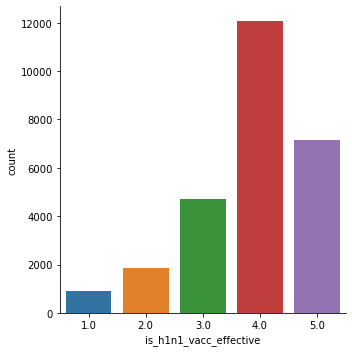

In [85]:
sns.factorplot('is_h1n1_vacc_effective', data = features, kind = "count")

In [86]:
features.is_h1n1_risky.value_counts()

2.0    10307
1.0     8139
4.0     5394
5.0     1750
3.0     1117
Name: is_h1n1_risky, dtype: int64

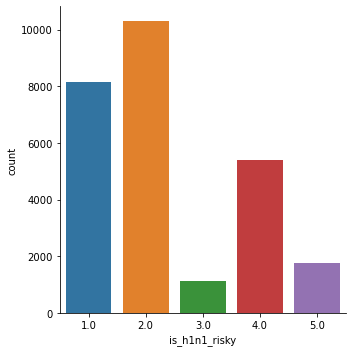

In [87]:
sns.factorplot('is_h1n1_risky', data = features, kind = "count")

In [88]:
features.sick_from_h1n1_vacc.value_counts()

2.0    9524
1.0    8998
4.0    5850
5.0    2187
3.0     148
Name: sick_from_h1n1_vacc, dtype: int64

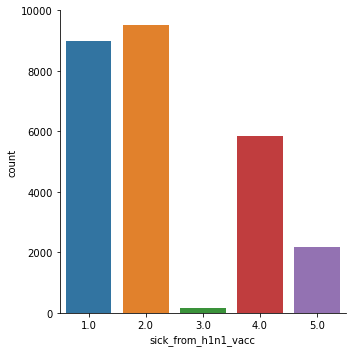

In [89]:
sns.factorplot('sick_from_h1n1_vacc', data = features, kind = "count")

In [90]:
features.is_seas_vacc_effective.value_counts()

4.0    12091
5.0     9973
2.0     2206
1.0     1221
3.0     1216
Name: is_seas_vacc_effective, dtype: int64

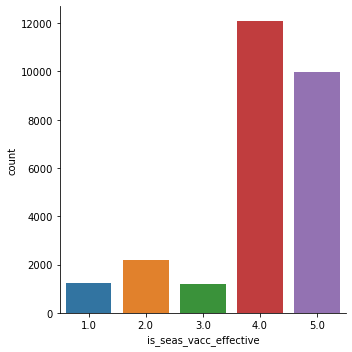

In [91]:
sns.factorplot('is_seas_vacc_effective', data = features, kind = "count")

In [92]:
features.is_seas_risky.value_counts()

2.0    8954
4.0    7630
1.0    5974
5.0    2958
3.0    1191
Name: is_seas_risky, dtype: int64

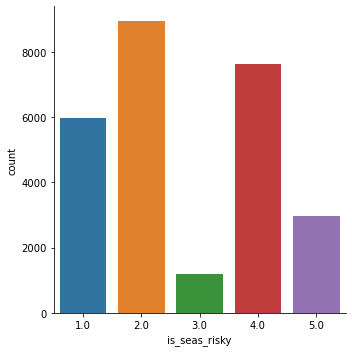

In [93]:
sns.factorplot('is_seas_risky', data = features, kind = "count")

In [94]:
features.sick_from_seas_vacc.value_counts()

1.0    11870
2.0     8170
4.0     4852
5.0     1721
3.0       94
Name: sick_from_seas_vacc, dtype: int64

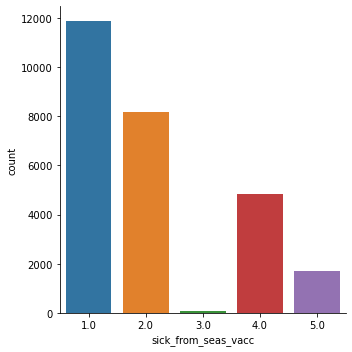

In [95]:
sns.factorplot('sick_from_seas_vacc', data = features, kind = "count")

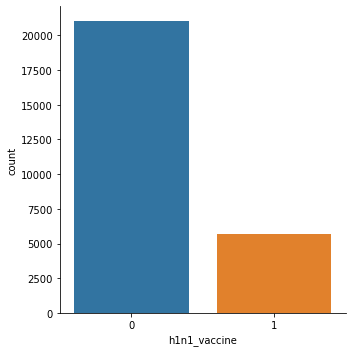

In [96]:
sns.factorplot('h1n1_vaccine', data = labels, kind = "count")

In [99]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

In [105]:
features = pd.DataFrame(features)
col_name = ['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication', 'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently', 'avoid_large_gatherings', 'reduced_outside_home_cont', 'avoid_touch_face','dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'chronic_medic_condition', 'cont_child_undr_6_mnths', 'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective', 'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification', 'race', 'sex', 'income_level', 'marital_status', 'housing_status', 'employment', 'census_msa', 'no_of_adults', 'no_of_children']

features.columns = col_name

In [106]:
X = features
y = labels

In [107]:
bestfeatures = SelectKBest(score_func=chi2, k=30)

In [102]:
fit = bestfeatures.fit(X,y)

In [108]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

print(featureScores.nlargest(25,'Score'))

                        Specs        Score
10          dr_recc_h1n1_vacc  3307.810188
11      dr_recc_seasonal_vacc   892.499456
17              is_h1n1_risky   836.299170
14           is_health_worker   672.405011
20              is_seas_risky   477.567746
12    chronic_medic_condition   172.886102
16     is_h1n1_vacc_effective   167.344330
5            bought_face_mask   123.284462
13    cont_child_undr_6_mnths   109.342915
19     is_seas_vacc_effective    80.935639
1                  h1n1_worry    67.119631
2              h1n1_awareness    55.904059
18        sick_from_h1n1_vacc    50.293380
9            avoid_touch_face    43.065378
3        antiviral_medication    41.109698
27             marital_status    34.131547
6       wash_hands_frequently    25.856864
4           contact_avoidance    15.950408
22                age_bracket    10.942374
8   reduced_outside_home_cont     8.641545
25                        sex     6.776568
7      avoid_large_gatherings     5.614840
24         

In [109]:
features_kbest = features.iloc[:,[9,10,19,16,13,11,21,18,15,0,32,8,12,1,24,5,26,17,6,3,7,2,4]]

[0.05194562 0.03452918 0.02801146 0.00910375 0.01857073 0.01048616
 0.01209315 0.01952452 0.0200188  0.01904923 0.1118379  0.02567601
 0.01843294 0.01177648 0.0231014  0.00712224 0.05674704 0.06636853
 0.03551887 0.03315274 0.04455443 0.03371408 0.0391474  0.03445254
 0.02161764 0.02308135 0.03180314 0.02017454 0.02228002 0.02582383
 0.03504544 0.02893451 0.02630431]


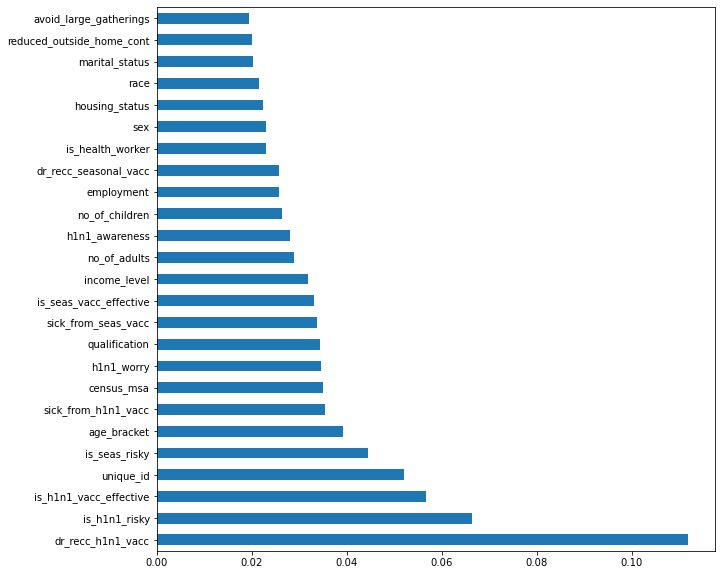

In [110]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
plt.figure(figsize=(10,10))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [112]:
features_tree = features.loc[:,['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication', 'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently', 'avoid_large_gatherings', 'reduced_outside_home_cont', 'avoid_touch_face','dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'chronic_medic_condition', 'cont_child_undr_6_mnths', 'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective', 'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification', 'race', 'sex', 'income_level', 'marital_status', 'housing_status', 'employment', 'census_msa', 'no_of_adults', 'no_of_children']]
features.corrwith(labels.h1n1_vaccine)

unique_id                   -0.003280
h1n1_worry                   0.121574
h1n1_awareness               0.117771
antiviral_medication         0.040226
contact_avoidance            0.046837
bought_face_mask             0.070413
wash_hands_frequently        0.074570
avoid_large_gatherings       0.018089
reduced_outside_home_cont    0.022080
avoid_touch_face             0.070855
dr_recc_h1n1_vacc            0.394086
dr_recc_seasonal_vacc        0.218976
chronic_medic_condition      0.094360
cont_child_undr_6_mnths      0.066712
is_health_worker             0.168056
has_health_insur             0.041891
is_h1n1_vacc_effective       0.267352
is_h1n1_risky                0.320580
sick_from_h1n1_vacc          0.074580
is_seas_vacc_effective       0.177799
is_seas_risky                0.255955
sick_from_seas_vacc          0.008415
age_bracket                  0.041074
qualification                0.020766
race                         0.041061
sex                         -0.020672
income_level

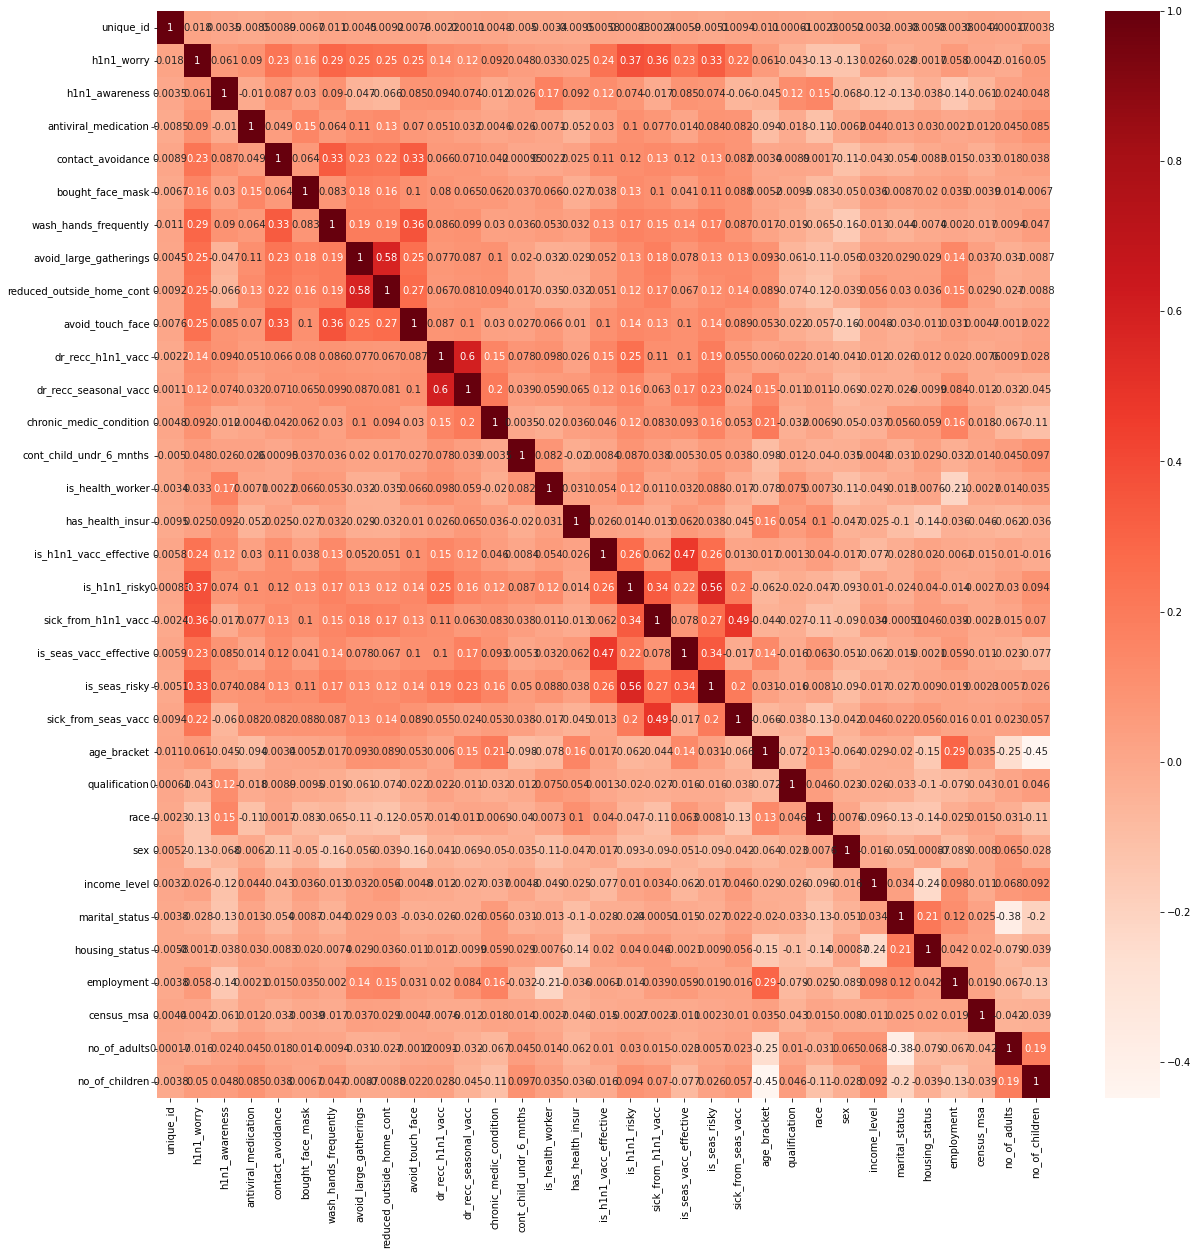

In [113]:
#get correlations of each features in dataset
corrmat = features.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(features[top_corr_features].corr(),annot=True,cmap="Reds")

In [114]:
features.drop(['sick_from_seas_vacc','census_msa',
               'no_of_adults','no_of_children','antiviral_medication',
               'qualification'], axis = 1, inplace = True)

In [115]:
X = features
y = labels

In [116]:
X

,unique_id,h1n1_worry,h1n1_awareness,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,age_bracket,race,sex,income_level,marital_status,housing_status,employment
0,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.25,0.25,0.00,0.75,1.000000,0.0,0.666667,1.0,0.5,0.666667
1,0.000037,1.000000,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.75,0.75,0.25,0.25,1.000000,1.0,0.666667,1.0,1.0,0.000000
2,0.000075,0.333333,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.75,0.00,0.00,1.000000,1.0,0.000000,1.0,0.5,0.000000
3,0.000112,0.333333,0.5,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.00,1.00,0.75,1.00,1.000000,0.0,0.666667,1.0,1.0,0.666667
4,0.000150,0.666667,0.5,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.25,0.50,0.00,0.50,1.000000,0.0,0.000000,0.0,0.5,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0.999850,0.666667,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.00,1.00,0.25,1.00,1.000000,0.0,0.000000,1.0,0.5,0.666667
26703,0.999888,0.333333,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.25,1.00,0.00,0.00,1.000000,1.0,0.000000,1.0,1.0,0.000000
26704,0.999925,0.666667,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.25,1.00,0.75,0.75,1.000000,0.0,1.000000,1.0,0.5,0.333333
26705,0.999963,0.333333,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.25,0.25,0.00,0.00,0.333333,0.0,0.000000,0.0,1.0,0.000000


In [117]:
y

,h1n1_vaccine
0,0
1,0
2,0
3,0
4,0
...,...
26702,0
26703,0
26704,0
26705,0


In [118]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=23)

In [119]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [120]:
y_pred = lr.predict(x_test)
y_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [121]:
y_test

,h1n1_vaccine
19436,0
11598,0
12999,1
4614,0
496,0
...,...
6768,0
12874,0
6857,1
21968,0


In [122]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.836890053662798


In [123]:
lr_acc = accuracy_score(y_test, y_pred)
print(lr_acc)

0.836890053662798


In [124]:
results = pd.DataFrame()
results


""


In [125]:
tempresults = pd.DataFrame({'Algorithm': ['logistic Regression Method'], 'Accuracy':[lr_acc]})
results = pd.concat( [results,tempresults])
results = results[['Algorithm', 'Accuracy']]
results

,Algorithm,Accuracy
0,logistic Regression Method,0.83689


In [126]:
model_RF = RandomForestClassifier()

# Training

model_RF.fit(x_train,y_train)

# Predicting

y_pred_RF = model_RF.predict(x_test)

# Testing
RF = accuracy_score(y_test,y_pred_RF)
RF

0.8383876201173094

In [127]:
tempresults = pd.DataFrame({'Algorithm': ['Random forest Classifier Method'], 'Accuracy':[RF]})
results = pd.concat( [results,tempresults])
results = results[['Algorithm', 'Accuracy']]
results

,Algorithm,Accuracy
0,logistic Regression Method,0.836890
0,Random forest Classifier Method,0.838388


In [128]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [129]:
y_pred = dtc.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [130]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7469112691875702


In [131]:
dtc_acc = accuracy_score(y_test, y_pred)
print(dtc_acc)

0.7469112691875702


In [132]:
tempresults = pd.DataFrame({'Algorithm': ['Decision Tree Classifier Method'], 'Accuracy':[dtc_acc]})
results = pd.concat( [results,tempresults])
results = results[['Algorithm', 'Accuracy']]
results

,Algorithm,Accuracy
0,logistic Regression Method,0.836890
0,Random forest Classifier Method,0.838388
0,Decision Tree Classifier Method,0.746911


In [134]:
from sklearn import svm
svc = svm.SVC()
svc.fit(x_train, y_train)

SVC()

In [135]:
y_pred = svc.predict(x_test)
y_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [136]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8372644452764259


In [137]:
svc_acc = accuracy_score(y_test, y_pred)
print(svc_acc)

0.8372644452764259


In [138]:
tempresults = pd.DataFrame({'Algorithm': ['Support Vector Classifier Method'], 'Accuracy':[svc_acc]})
results = pd.concat( [results,tempresults])
results = results[['Algorithm', 'Accuracy']]
results

,Algorithm,Accuracy
0,logistic Regression Method,0.836890
0,Random forest Classifier Method,0.838388
0,Decision Tree Classifier Method,0.746911
0,Support Vector Classifier Method,0.837264


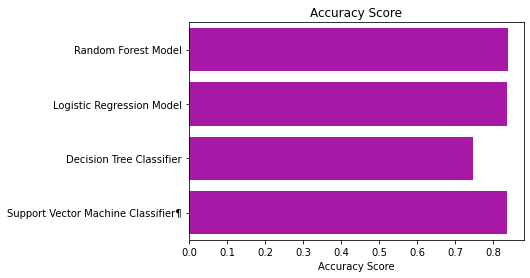

In [142]:
Accuracy_Score = [RF,lr_acc,dtc_acc,svc_acc]
Models = ['Random Forest Model','Logistic Regression Model','Decision Tree Classifier','Support Vector Machine Classifier¶']
sns.barplot(Accuracy_Score, Models, color="m")
plt.xlabel('Accuracy Score')
plt.title('Accuracy Score')
plt.show()

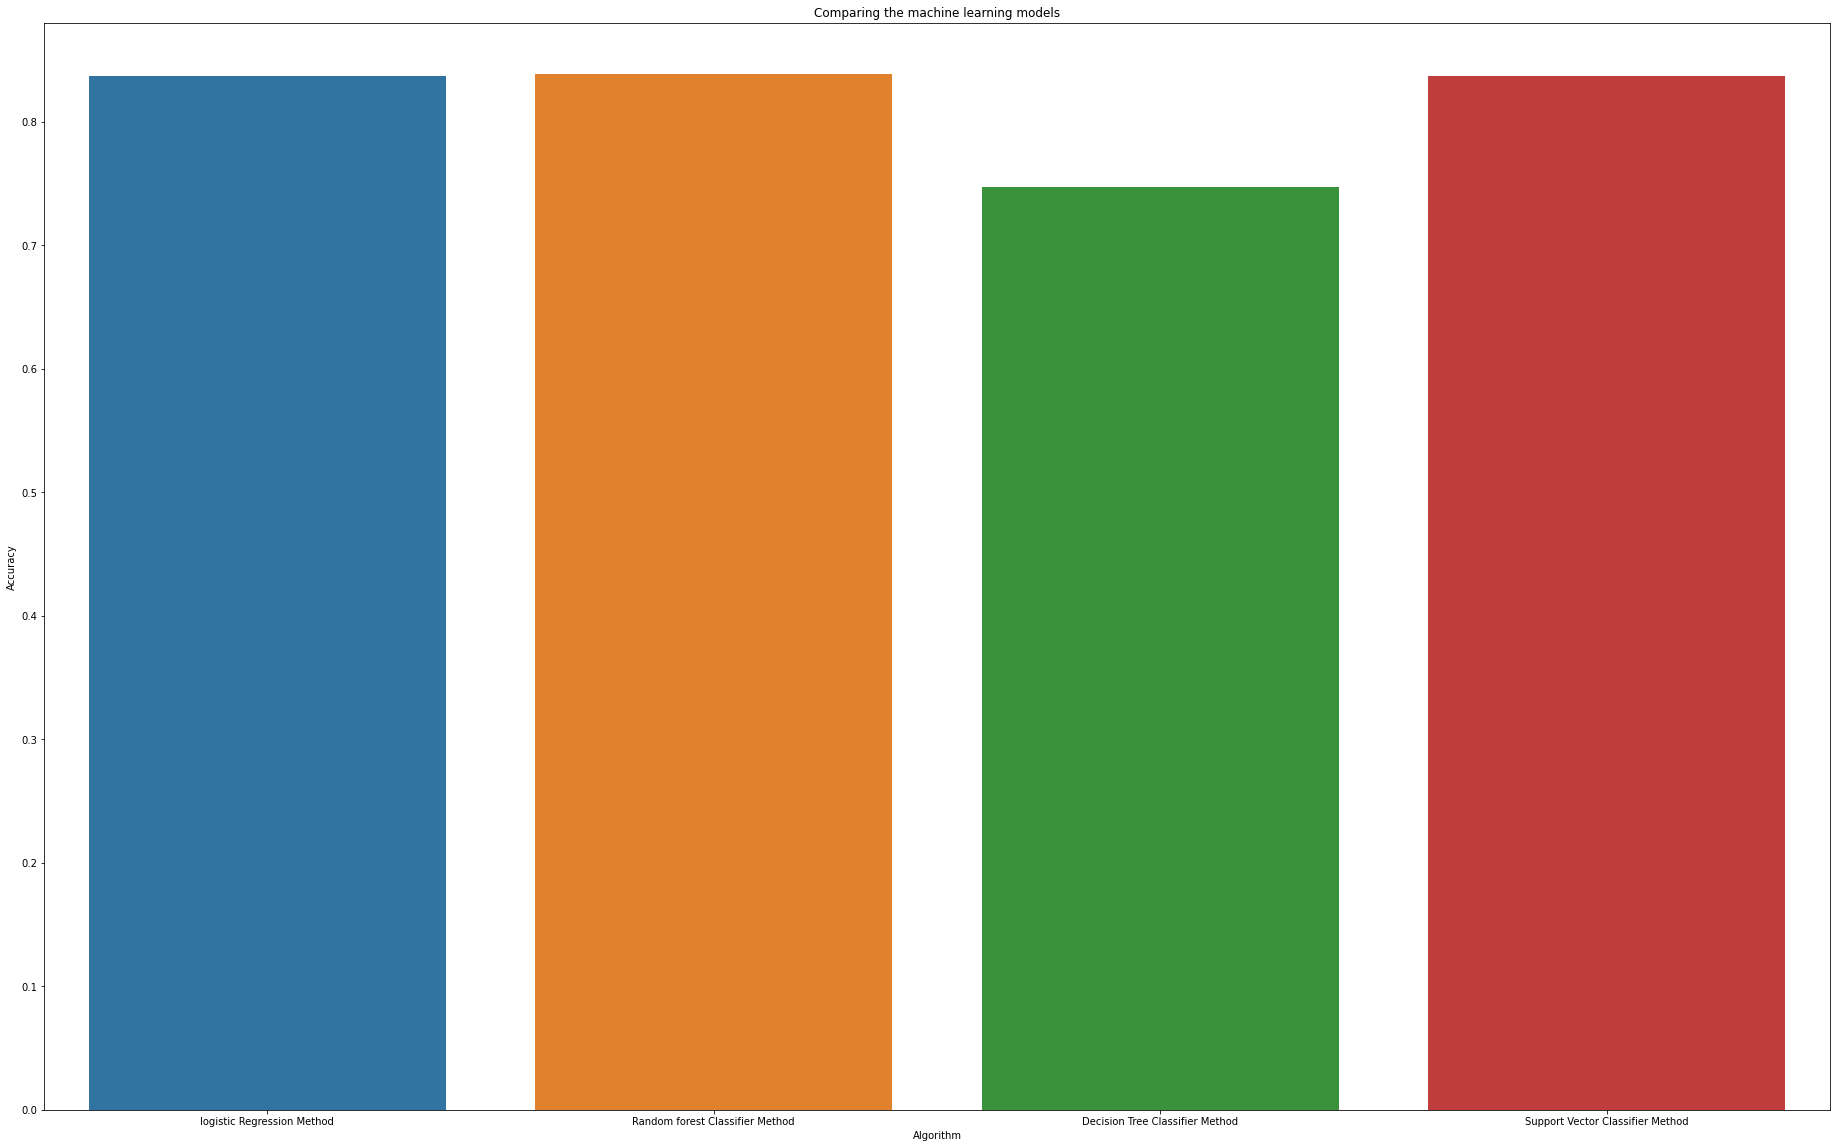

In [143]:
plt.figure(figsize=(32,20))
sns.barplot(x = "Algorithm", y = "Accuracy", data = results)
plt.title('Comparing the machine learning models')
plt.show()